<a href="https://colab.research.google.com/github/UttaraKet1607/Malarial-Cell-Image-Segmentation/blob/main/Segmentation_hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative study of segmentation of malarial cell images using multiple pathways

### 1. Download the dataset from kaggle using colab commands or directly from [kaggle datasets](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria
! unzip cell-images-for-detecting-malaria.zip

### 2. Import required libraries or modules

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("/content/cell_images"))

['Uninfected_segmented', 'Uninfected', 'Parasitized_segmented', 'Parasitized', 'cell_images']


In [3]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

### 3. Understand the data

#### 3.1 Visualize a few samples of the data

In [4]:
parasitized_data = os.listdir('/content/cell_images/Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C118P79ThinF_IMG_20151002_110212_cell_7.png', 'C176P137NThinF_IMG_20151201_122444_cell_118.png', 'C182P143NThinF_IMG_20151201_171905_cell_152.png', 'C126P87ThinF_IMG_20151004_105844_cell_150.png', 'C167P128ReThinF_IMG_20151201_105707_cell_234.png', 'C116P77ThinF_IMG_20150930_171739_cell_88.png', 'C132P93ThinF_IMG_20151004_152045_cell_123.png', 'C126P87ThinF_IMG_20151004_105342_cell_114.png', 'C99P60ThinF_IMG_20150918_142128_cell_108.png', 'C152P113ThinF_IMG_20151115_124557_cell_174.png']


['C236ThinF_IMG_20151127_102428_cell_118.png', 'C232ThinF_IMG_20151112_154211_cell_150.png', 'C102P63ThinF_IMG_20150918_161508_cell_175.png', 'C169P130ThinF_IMG_20151118_173039_cell_245.png', 'C227ThinF_IMG_20151112_135509_cell_143.png', 'C74P35_ThinF_IMG_20150815_120957_cell_112.png', 'C86P47ThinF_IMG_20150820_124025_cell_83.png', 'C82P43ThinF_IMG_20150817_123652_cell_100.png', 'C81P42ThinF_IMG_20150817_121113_cell_41.png', 'C158P119ThinF_IMG_20151115_181136_cell_163.png']


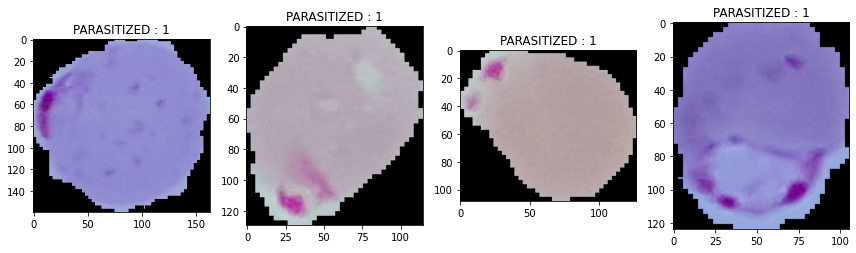

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

#### 3.2 Resize all images and save image data as numpy array along with labels [0,1] 

In [6]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

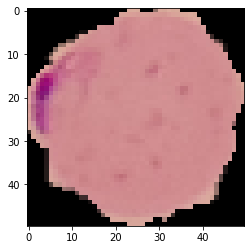

In [7]:
plt.imshow(data[0])
plt.show()

In [8]:
image_data = np.array(data)
labels = np.array(labels)

In [9]:
idx = np.arange(image_data.shape[0])
image_data = image_data[idx]
labels = labels[idx]

In [10]:
image_data.shape, labels.shape

((27558, 50, 50, 3), (27558,))

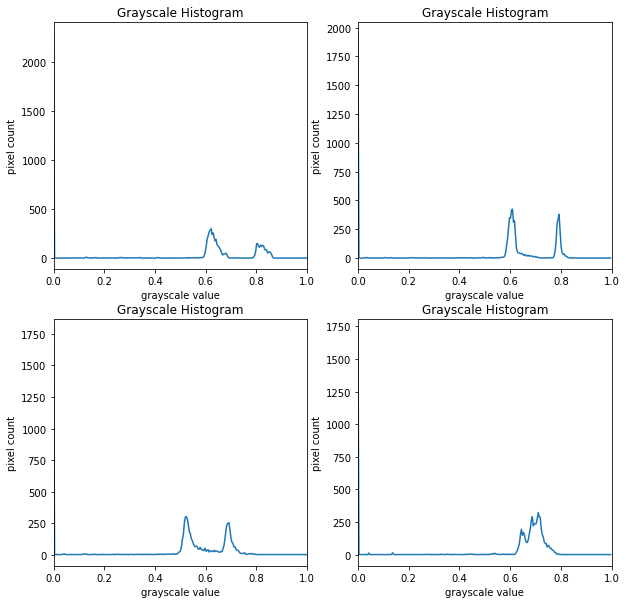

In [11]:
plt.figure(figsize = (10,10))
for i in range(4):
  histogram, bin_edges = np.histogram(image_data[np.random.randint(0,27559)], bins=256, range=(0, 1))
  plt.subplot(2,2, i+1)
  plt.title("Grayscale Histogram")
  plt.xlabel("grayscale value")
  plt.ylabel("pixel count")
  plt.xlim([0.0, 1.0])  # <- named arguments do not work here
  plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

### 4. Image segmentation

#### 4.1 Implement traditional segmentation technique (using thresholding) on a single image 

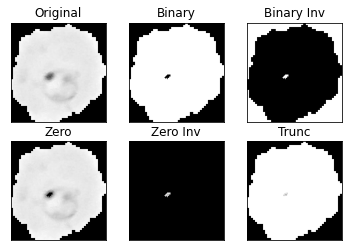

In [12]:
imgpath1 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = cv2.imread(imgpath1, 0)
th = 0
max_val = 255
    
ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
output = [img, o1, o2, o3, o4, o5]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Trunc']
    
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show()  

#### 4.2 Implement traditional image segmentation on multiple images and generate a segmented mask 

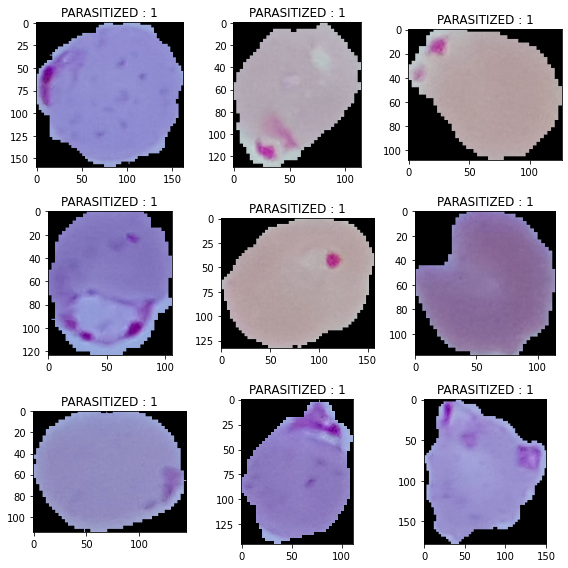

In [13]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

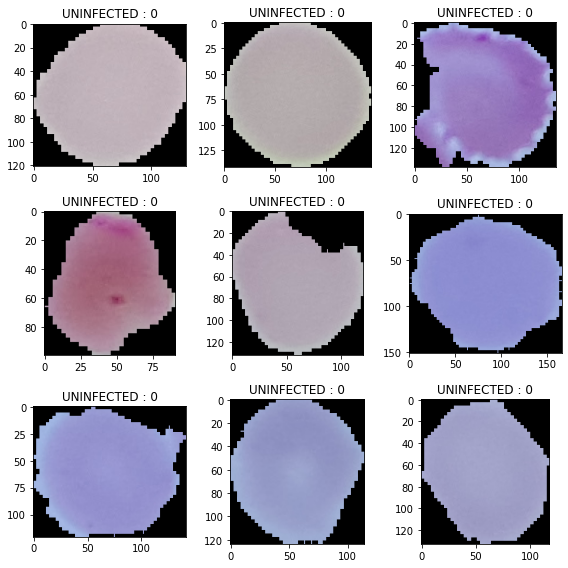

In [14]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    plt.imshow(img, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

##### 4.2.1 Segmentation mask using `cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU`

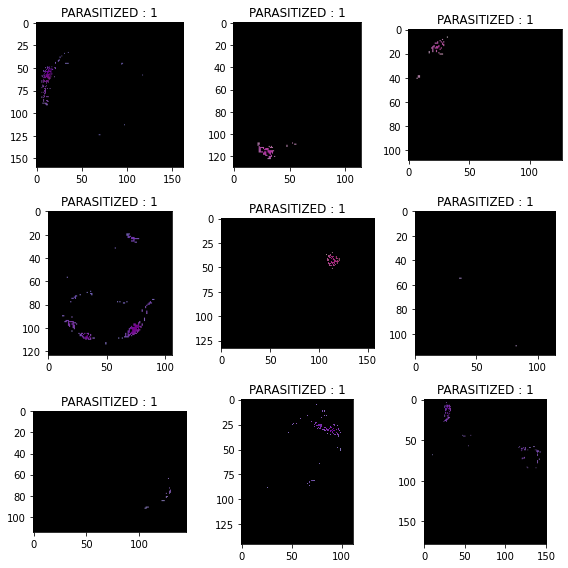

In [15]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    image = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    output1 = cv2.bitwise_and(image1, image1, mask = thresh)
    plt.imshow(output1, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

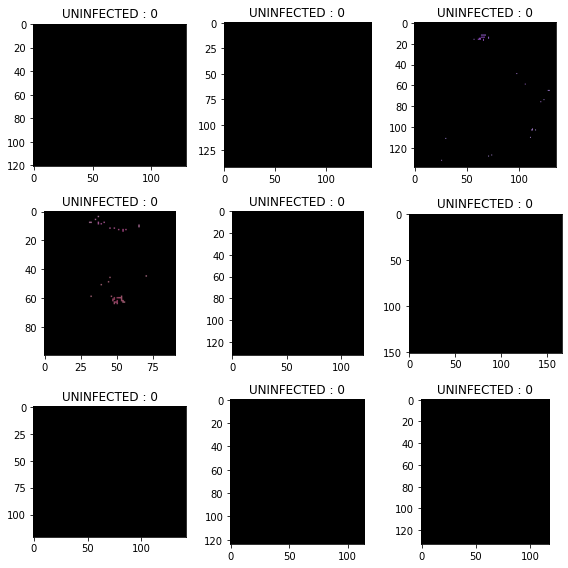

In [16]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    image = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    output1 = cv2.bitwise_and(image1, image1, mask = thresh)
    plt.imshow(output1, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

##### 4.2.2 Segmentation mask using watershed algorithm on top of `cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU`

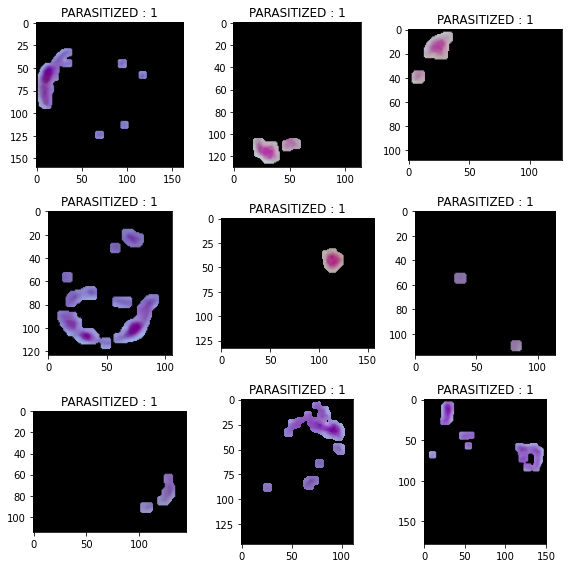

In [17]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    image = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=4)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    medianBlur = cv2.medianBlur(output1, 3)
    plt.imshow(medianBlur, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

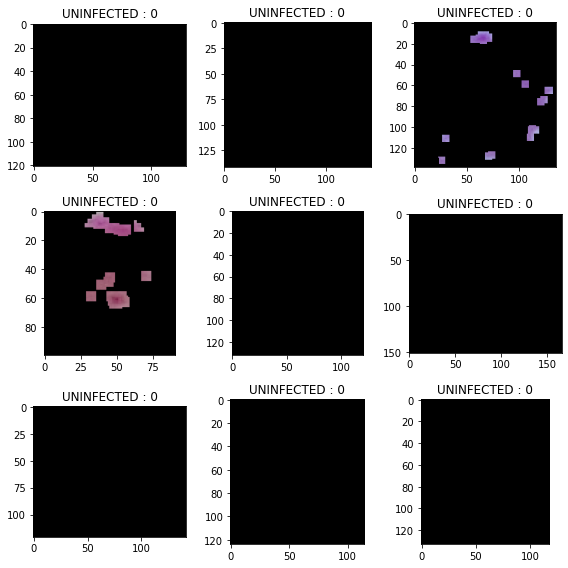

In [18]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    image = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=3)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    plt.imshow(output1, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

##### 4.2.3 Segmentation using k-means algorithm

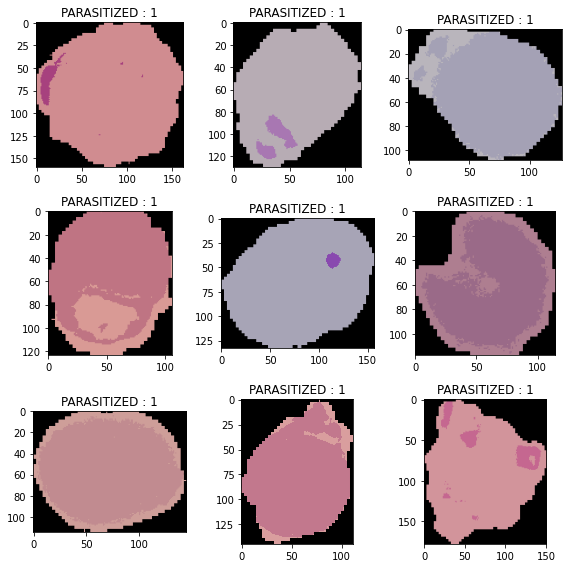

In [19]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = image.reshape((-1,3))
    # Convert to float type
    pixel_vals = np.float32(pixel_vals)   
    #the below line of code defines the criteria for the algorithm to stop running, which will happen is 100 iterations are run or the epsilon (which is the required accuracy) becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.95)
    # then perform k-means clustering wit h number of clusters defined as 3 also random centres are initially choosed for k-means clustering
    k = 3
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    plt.imshow(segmented_image, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

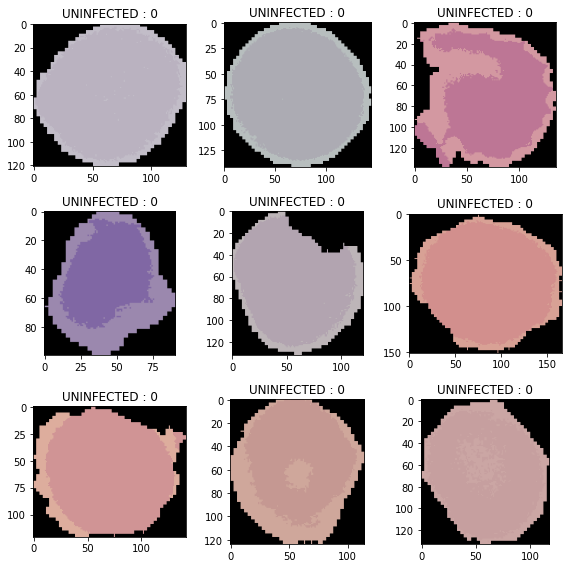

In [20]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    # Read in the image
    image = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    # Change color to RGB (from BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = image.reshape((-1,3))
    # Convert to float type
    pixel_vals = np.float32(pixel_vals)   
    #the below line of code defines the criteria for the algorithm to stop running, which will happen is 100 iterations are run or the epsilon (which is the required accuracy) becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    # then perform k-means clustering wit h number of clusters defined as 3 also random centres are initially choosed for k-means clustering
    k = 3
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    plt.imshow(segmented_image, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

##### 4.2.4 Segmentation using Adaptive thresholding

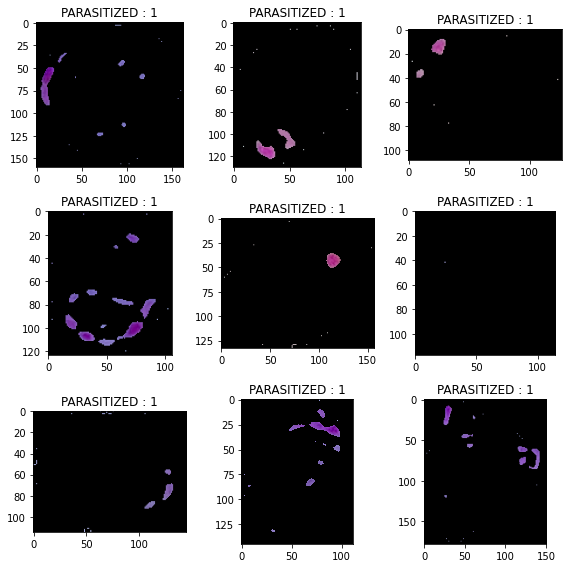

In [21]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 17,10)
    output1 = cv2.bitwise_and(image1, image1, mask = thresh)
    plt.imshow(output1, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

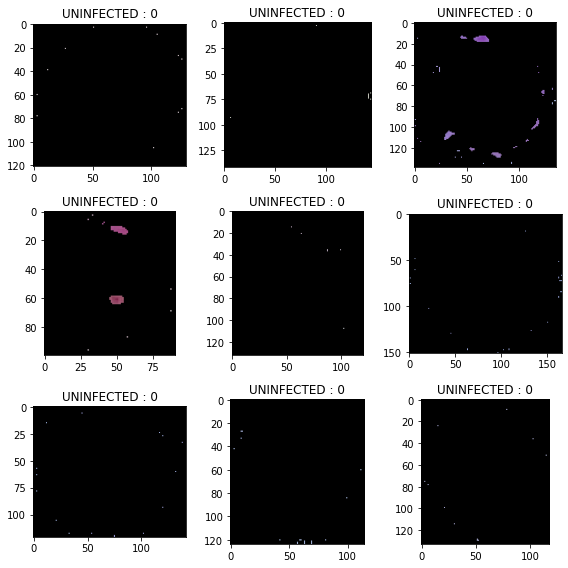

In [22]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    image1 = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i])
    gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 17,10)
    output1 = cv2.bitwise_and(image1, image1, mask = thresh)
    plt.imshow(output1, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

### 5. Generate segmented data for all image samples in the dataset

#### 5.1 Watershed algorithm on top of `cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU`

In [23]:
import os 
infected_dir = "/content/cell_images/Parasitized_segmented"
os.mkdir(infected_dir) 
uninfected_dir = "/content/cell_images/Uninfected_segmented"
os.mkdir(uninfected_dir) 

FileExistsError: ignored

In [ ]:
for images in parasitized_data:
  try:
    image1 = cv2.imread('/content/cell_images/Parasitized' + "/" + images)
    image = cv2.imread('/content/cell_images/Parasitized' + "/" + images,0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=4)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    isWritten = cv2.imwrite('/content/cell_images/Parasitized_segmented' + "/" + images, output1)        
    if isWritten:
	        print('Image is successfully saved as file.')
  except:
    None

In [ ]:
for images in uninfected_data:
  try:
    image1 = cv2.imread('/content/cell_images/Uninfected' + "/" + images)
    image = cv2.imread('/content/cell_images/Uninfected' + "/" + images,0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=4)
    output1 = cv2.bitwise_and(image1, image1, mask = sure_bg)
    isWritten = cv2.imwrite('/content/cell_images/Uninfected_segmented' + "/" + images, output1)        
    if isWritten:
	        print('Image is successfully saved as file.')
  except:
    None

In [ ]:
#!zip -r /content/cell_images.zip /content/cell_images/

#### 5.2 Cross check if all image files are saved successfully 

In [24]:
import os

list = os.listdir('/content/cell_images/Parasitized') # dir is your directory path
number_files = len(list)
list = os.listdir('/content/cell_images/Parasitized_segmented') # dir is your directory path
number_files = len(list)
print(number_files)
print(len(parasitized_data))

13779
13780


In [25]:
list = os.listdir('/content/cell_images/Uninfected') # dir is your directory path
number_files = len(list)
list = os.listdir('/content/cell_images/Uninfected_segmented') # dir is your directory path
number_files = len(list)
print(number_files)
print(len(uninfected_data))

13779
13780


In [26]:
seg_parasitized_data = os.listdir('/content/cell_images/Parasitized_segmented')
print(seg_parasitized_data[:10]) #the output we get are the .png files

seg_uninfected_data = os.listdir('/content/cell_images/Uninfected_segmented/')
print('\n')
print(seg_uninfected_data[:10])

['C118P79ThinF_IMG_20151002_110212_cell_7.png', 'C176P137NThinF_IMG_20151201_122444_cell_118.png', 'C182P143NThinF_IMG_20151201_171905_cell_152.png', 'C126P87ThinF_IMG_20151004_105844_cell_150.png', 'C167P128ReThinF_IMG_20151201_105707_cell_234.png', 'C116P77ThinF_IMG_20150930_171739_cell_88.png', 'C132P93ThinF_IMG_20151004_152045_cell_123.png', 'C126P87ThinF_IMG_20151004_105342_cell_114.png', 'C99P60ThinF_IMG_20150918_142128_cell_108.png', 'C152P113ThinF_IMG_20151115_124557_cell_174.png']


['C236ThinF_IMG_20151127_102428_cell_118.png', 'C232ThinF_IMG_20151112_154211_cell_150.png', 'C102P63ThinF_IMG_20150918_161508_cell_175.png', 'C169P130ThinF_IMG_20151118_173039_cell_245.png', 'C227ThinF_IMG_20151112_135509_cell_143.png', 'C74P35_ThinF_IMG_20150815_120957_cell_112.png', 'C86P47ThinF_IMG_20150820_124025_cell_83.png', 'C82P43ThinF_IMG_20150817_123652_cell_100.png', 'C81P42ThinF_IMG_20150817_121113_cell_41.png', 'C158P119ThinF_IMG_20151115_181136_cell_163.png']


In [27]:
data = []
labels = []
for img in seg_parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/Parasitized_segmented' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in seg_uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/Uninfected_segmented' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [28]:
image_data = np.array(data)
labels = np.array(labels)

In [29]:
idx = np.arange(image_data.shape[0])
image_data = image_data[idx]
labels = labels[idx]

In [30]:
image_data.shape, labels.shape

((27558, 50, 50, 3), (27558,))

In [31]:
img = image_data[5]
rows,cols,_ = img.shape
sum = 0
sum_b = 0
print(img.shape)
for i in range(rows):
    for j in range(cols):
        k = img[i,j]
        for u in k:
          if u == 0: sum = sum + 1
        for v in k:
          if v != 0: sum_b = sum_b + 1
print(sum, sum_b)
print(sum + sum_b)


(50, 50, 3)
7392 108
7500


In [ ]:
percent_cell=[]
for images in range(0,13779):
  try:
    image1 = image_data[images]
    rows,cols,_ = image1.shape
    sum = 0
    sum_b = 0
    print(image1.shape)
    for i in range(rows):
        for j in range(cols):
          k = image1[i,j]
          for u in k:
                if u == 0: sum = sum + 1
          for v in k:
                if v != 0: sum_b = sum_b + 1
    percent_cell.append(sum/7500) 
  except:
    None

In [ ]:
len(percent_cell)

In [ ]:
plt.hist(percent_cell, 10)
plt.show()

## Reference code

https://www.analyticsvidhya.com/blog/2021/09/image-segmentation-algorithms-with-implementation-in-python/

https://www.askpython.com/python-modules/opencv-filter2d